### Prerequisites

In [ ]:
!pip install pandas
!pip install numpy
!pip install datetime
!pip install matplotlib
!pip install pandas_datareader

### Importing all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

### Taking input of ticker symbols from user

In [ ]:
# creating an empty list
ticku = []
tickers = []
# number of elements as input
n = int(input("Enter number of elements : "))
 
# iterating till the range
for i in range(0, n):
    ele = str(input())
 
    ticku.append(ele) # adding the element
    
t_len = len(ticku)

### Start date input and conversion into datetime format

In [ ]:
date_entry = input('Enter a date in YYYY-MM-DD format')
year, month, day = map(int, date_entry.split('-'))
start = dt.date(year, month, day)

### Appending .NS to each of the ticker values

In [ ]:
for t in ticku:
    t = t + '.NS'
    tickers.append(t)
print(tickers)
tickers.append('^NSEI')
print(tickers)

### Fetching data from yahoo finance

In [ ]:
data = pdr.get_data_yahoo(tickers, start)
crop = data['Adj Close']
#calculate log returns
log_returns = np.log(crop/crop.shift())

In [ ]:
n = 5000
weights = np.zeros((n,t_len))
exp_rtns = np.zeros(n)
exp_vols = np.zeros(n)
sharpe_ratios = np.zeros(n)

## Performing Monte Carlo Simulation on the given portfolio

### Calculating Expected Returns, Expected Volatility/Risks and Sharpe Ratios for 5000 different combinations of weights

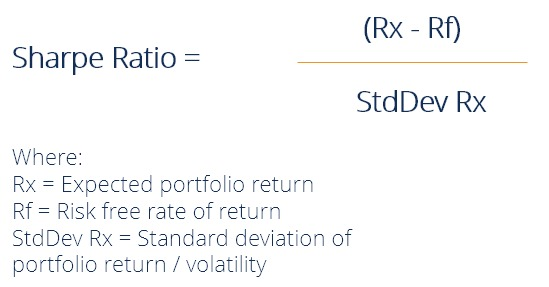

In [ ]:
for i in range(n):
    weight = np.random.random(t_len)
    weight /= weight.sum()
    weights[i] = weight
    exp_rtns[i] = (np.sum(log_returns.mean() * weight)*252) - 0.063
    exp_vols[i] = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov()*252, weight)))
    sharpe_ratios[i] = exp_rtns[i]/exp_vols[i]

### Printing out the index of the most efficient sharpe ratio for our portfolio

In [ ]:
sharpe_ratios.argmax()

### Plotting the Monte Carlo Simulation of Sharpe Ratios

In [ ]:
fig, ax3 = plt.subplots()
ax3.scatter(exp_vols, exp_rtns, c=sharpe_ratios)
ax3.scatter(exp_vols[sharpe_ratios.argmax()], exp_rtns[sharpe_ratios.argmax()], c='r')